<a href="https://colab.research.google.com/github/Santiago-R/aupa.ai/blob/main/00_Empieza_a_jugar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [87]:
from fastai.vision.all import *

In [88]:
path = untar_data(URLs.PETS)/'images'
# path = untar_data(URLs.IMAGEWOOF)/'images'

In [90]:
# get_image_files(path)

In [91]:
def is_cat(img_name):
    return img_name[0].isupper()

In [4]:
dls = ImageDataLoaders.from_name_func(
    path,
    get_image_files(path),
    valid_pct = 0.2,
    label_func = is_cat,
    item_tfms = Resize(224)
)

In [5]:
learn = vision_learner(dls, resnet18, metrics=accuracy)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 341MB/s]


In [44]:
untar_data??

In [6]:
learn.fit_one_cycle(2)

epoch,train_loss,valid_loss,accuracy,time
0,0.150423,0.028718,0.991881,00:59
1,0.047128,0.021072,0.991881,00:51


# ¿¿Qué acabamos de hacer??

#### Entrenamiento

In [7]:
learn.fit_one_cycle?

In [8]:
learn.fit_one_cycle??

Busca en Google 1Cycle policy  

https://towardsdatascience.com/finding-good-learning-rate-and-the-one-cycle-policy-7159fe1db5d6

In [9]:
learn = vision_learner(dls, resnet18, metrics=accuracy)

lr = SuggestedLRs(valley=0.0006918309954926372)


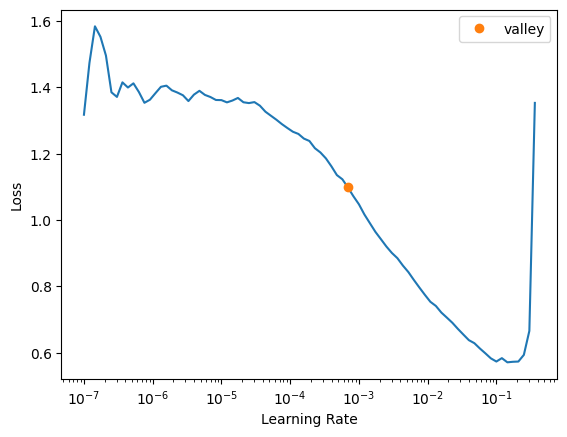

In [10]:
lr = learn.lr_find()
print(f'lr = {lr}')

In [11]:
learn.fit_one_cycle(5, lr_max=lr)

epoch,train_loss,valid_loss,accuracy,time
0,0.190841,0.033012,0.987145,00:51
1,0.070695,0.032090,0.988498,00:50


#### Carga de imágenes

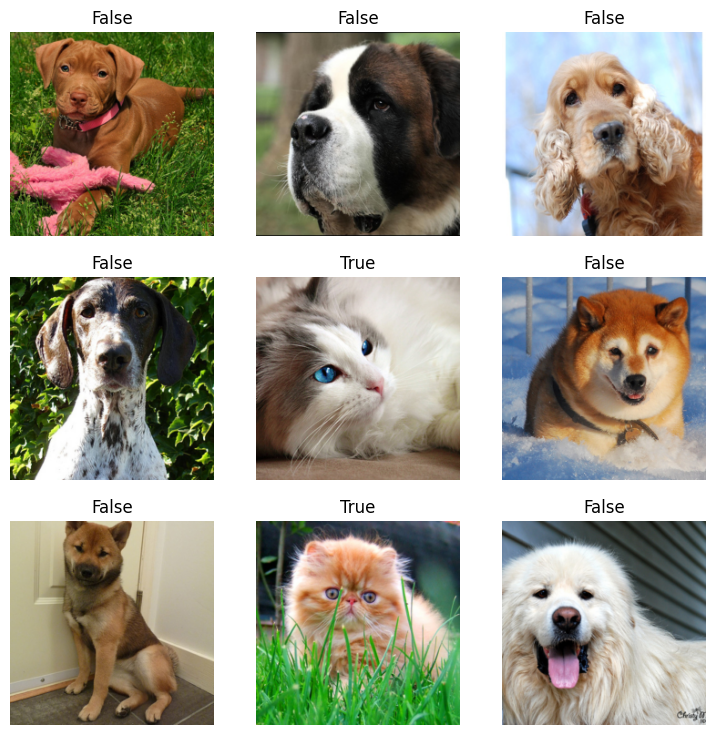

In [42]:
dls.show_batch()

In [40]:
len(dls[0]), len(dls[1])

(92, 24)

In [12]:
ImageDataLoaders.from_name_func??

In [13]:
get_image_files(path)

(#7390) [Path('/root/.fastai/data/oxford-iiit-pet/images/Egyptian_Mau_132.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/shiba_inu_9.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/havanese_81.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/Bengal_119.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/wheaten_terrier_16.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/leonberger_51.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/Egyptian_Mau_77.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/Abyssinian_190.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/Bengal_197.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/german_shorthaired_135.jpg')...]

In [24]:
for p in get_image_files(path):
    print(p.name, '-->', 'cat' if is_cat(p.name) else 'dog')

Streaming output truncated to the last 5000 lines.
miniature_pinscher_108.jpg --> dog
samoyed_85.jpg --> dog
basset_hound_114.jpg --> dog
havanese_32.jpg --> dog
Egyptian_Mau_85.jpg --> cat
chihuahua_17.jpg --> dog
pug_99.jpg --> dog
chihuahua_160.jpg --> dog
japanese_chin_16.jpg --> dog
german_shorthaired_195.jpg --> dog
Ragdoll_73.jpg --> cat
Russian_Blue_226.jpg --> cat
japanese_chin_54.jpg --> dog
keeshond_125.jpg --> dog
Birman_91.jpg --> cat
shiba_inu_57.jpg --> dog
newfoundland_68.jpg --> dog
keeshond_122.jpg --> dog
staffordshire_bull_terrier_191.jpg --> dog
american_pit_bull_terrier_129.jpg --> dog
havanese_166.jpg --> dog
Russian_Blue_175.jpg --> cat
pomeranian_143.jpg --> dog
Bengal_142.jpg --> cat
pug_28.jpg --> dog
chihuahua_145.jpg --> dog
miniature_pinscher_7.jpg --> dog
Russian_Blue_130.jpg --> cat
Abyssinian_125.jpg --> cat
staffordshire_bull_terrier_101.jpg --> dog
Persian_273.jpg --> cat
keeshond_35.jpg --> dog
shiba_inu_179.jpg --> dog
Persian_42.jpg --> cat
english